**Background:**

As a talent sourcing and management company, we are interested in finding talented individuals for sourcing these candidates to technology companies. Finding talented candidates is not easy, for several reasons. The first reason is one needs to understand what the role is very well to fill in that spot, this requires understanding the client’s needs and what they are looking for in a potential candidate. The second reason is one needs to understand what makes a candidate shine for the role we are in search for. Third, where to find talented individuals is another challenge.

The nature of our job requires a lot of human labor and is full of manual operations. Towards automating this process we want to build a better approach that could save us time and finally help us spot potential candidates that could fit the roles we are in search for. Moreover, going beyond that for a specific role we want to fill in we are interested in developing a machine learning powered pipeline that could spot talented individuals, and rank them based on their fitness.

We are right now semi-automatically sourcing a few candidates, therefore the sourcing part is not a concern at this time but we expect to first determine best matching candidates based on how fit these candidates are for a given role. We generally make these searches based on some keywords such as “full-stack software engineer”, “engineering manager” or “aspiring human resources” based on the role we are trying to fill in. These keywords might change, and you can expect that specific keywords will be provided to you.

Assuming that we were able to list and rank fitting candidates, we then employ a review procedure, as each candidate needs to be reviewed and then determined how good a fit they are through manual inspection. This procedure is done manually and at the end of this manual review, we might choose not the first fitting candidate in the list but maybe the 7th candidate in the list. If that happens, we are interested in being able to re-rank the previous list based on this information. This supervisory signal is going to be supplied by starring the 7th candidate in the list. Starring one candidate actually sets this candidate as an ideal candidate for the given role. Then, we expect the list to be re-ranked each time a candidate is starred.

**Data Description:**

The data comes from our sourcing efforts. We removed any field that could directly reveal personal details and gave a unique identifier for each candidate.

Attributes:

    id : unique identifier for candidate (numeric)
    job_title : job title for candidate (text)
    location : geographical location for candidate (text)
    connections: number of connections candidate has, 500+ means over 500 (text)

Output (desired target):
    fit - how fit the candidate is for the role? (numeric, probability between 0-1)

**Keywords:** “Aspiring human resources” or “seeking human resources”

**Goal(s):**

    Predict how fit the candidate is based on their available information (variable fit)

**Success Metric(s):**

    Rank candidates based on a fitness score.
    Re-rank candidates when a candidate is starred.

**Bonus(es):**

We are interested in a robust algorithm, tell us how your solution works and show us how your ranking gets better with starring action.

How can we filter out candidates which in the first place should not be in this list?

Can we determine a cut-off point that would work for other roles without losing high potential candidates?


In [1]:
# business objective to find human resourse professional that have the knowledge to find good candidates for technical roles

In [2]:
# matching the keyword that with profile that HR is looking for ('aspiring human resources',“seeking human resources”)

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
# Uncomment the following line the first time you run the code
# nltk.download('stopwords')
# nltk.download('wordnet')

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.spatial.distance import cosine
from sentence_transformers import SentenceTransformer, util
import tensorflow as tf
from sklearn.model_selection import train_test_split

import tensorflow as tf

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

from IPython.display import display
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import os
import random
from itertools import combinations

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.spatial.distance import cosine
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split

import tensorflow as tf

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

from IPython.display import display
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Read in raw data

In [4]:
df1 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project3\data\potential-talentsAspiringhumanresourcesseekinghumanresources.csv')

In [5]:
df1.shape

(104, 5)

In [6]:
# Reccommendation
# 1 do keyword mapping with a similarity score
# 

In [7]:
# display all 104 rows
pd.set_option('display.max_rows',None)

#specify no max value for the column width
pd.set_option('display.max_colwidth', None)

# pd.reset_option('max_columns')
# pd.set_option('max_columns',104)
df1.head(104)

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Program in Korea),Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN
6,7,Student at Humber College and Aspiring Human Resources Generalist,Kanada,61,NaN
7,8,HR Senior Specialist,San Francisco Bay Area,500+,NaN
8,9,Student at Humber College and Aspiring Human Resources Generalist,Kanada,61,NaN
9,10,Seeking Human Resources HRIS and Generalist Positions,Greater Philadelphia Area,500+,NaN


### Convert to lower case

In [8]:
df1['job_title'] = df1['job_title'].str.lower()

df1['location'] = df1['location'].str.lower()

### Remove STOP words 

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
df1['job_title'] = df1['job_title'].map(lambda text: ' '.join([word for word in text.split() if word not in stop ]))

In [11]:
df1['job_title'].head()

0    2019 c.t. bauer college business graduate (magna cum laude) aspiring human resources professional
1                                                  native english teacher epik (english program korea)
2                                                                aspiring human resources professional
3                                                                  people development coordinator ryan
4                                                         advisory board member celal bayar university
Name: job_title, dtype: object

In [16]:
df1.head()

,id,job_title,location,connection,fit
0,1,2019 c.t. bauer college business graduate (magna cum laude) aspiring human resources professional,"houston, texas",85,NaN
1,2,native english teacher epik (english program korea),kanada,500+,NaN
2,3,aspiring human resources professional,"raleigh-durham, north carolina area",44,NaN
3,4,people development coordinator ryan,"denton, texas",500+,NaN
4,5,advisory board member celal bayar university,"i̇zmir, türkiye",500+,NaN


# Remove special characters and tokenize with TextBlob

In [17]:
test_string = 'SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR'

In [18]:
from textblob import TextBlob

In [19]:
txt_toks = TextBlob(test_string).words
txt_toks
' '.join(txt_toks)


'SVP CHRO Marketing Communications CSR Officer ENGIE Houston The Woodlands Energy GPHR SPHR'

In [20]:
from textblob import TextBlob

def remove_special_char(string):
    txt_tokens = TextBlob(string).words
    clean_txt_tokens = [word for word in txt_tokens if word.isalnum()]
    return ' '.join(clean_txt_tokens)

In [21]:
# test function

remove_special_char("Hello, World!" )

'Hello World'

**word.isalnum()** is a string method in Python used to check if all characters in a given string are alphanumeric, meaning they are either letters (alphabetic characters) or numbers (digits).

If word is a string, word.isalnum() returns True if all characters in the string are either letters or digits, and False otherwise.
Spaces, punctuation, or any special characters other than letters and digits will cause word.isalnum() to return False.

In [22]:
# df['selftext'] = df['selftext'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))

df1['job_title'] = df1['job_title'].map(remove_special_char)

In [23]:
df1['location'] = df1['location'].map(remove_special_char)

In [24]:
df1['connection'] = df1['connection'].map(remove_special_char)
df1['connection'].dtype

dtype('O')

### convert connection to integer

In [25]:
df1['connection'].astype(int).dtype

dtype('int32')

In [26]:
df1['connection'] = df1['connection'].astype(int)

In [27]:
df1.dtypes

id              int64
job_title      object
location       object
connection      int32
fit           float64
dtype: object

In [28]:
df1.sample(5)

,id,job_title,location,connection,fit
41,42,svp chro marketing communications csr officer engie houston woodlands energy gphr sphr,houston texas area,500,NaN
68,69,director human resources north america groupe beneteau,greater grand rapids michigan area,500,NaN
71,72,business management major aspiring human resources manager,monroe louisiana area,5,NaN
63,64,svp chro marketing communications csr officer engie houston woodlands energy gphr sphr,houston texas area,500,NaN
73,74,human resources professional,greater boston area,16,NaN


In [29]:
# import sys
# !{sys.executable} -m pip install autocorrect
# correctly installed

In [30]:
# from autocorrect import Speller
# spell = Speller(lang='en')
# print(spell('Kanada'))

**clean up location column**

    america bibleşik devletleri is the turkish spelling of the united states
    
    türkiye is the turkish spelling of the country turkey
    
    kanada is the turkish spelling of canada




In [31]:
df1['location'] = df1['location'].str.replace('amerika birleşik devletleri','united states' )

df1['location'] = df1['location'].str.replace('türkiye','turkey')

df1['location'] = df1['location'].str.replace('kanada','canada') 

In [32]:
df1['location'].sample(20)

1                         canada
40        lake forest california
54            houston texas area
39     greater philadelphia area
21                  denton texas
55               atlanta georgia
74           san jose california
13                 houston texas
89          greater atlanta area
81             austin texas area
41            houston texas area
38                        canada
72            houston texas area
12               atlanta georgia
94     bridgewater massachusetts
91           torrance california
90          greater chicago area
23    greater new york city area
61     greater philadelphia area
14                 houston texas
Name: location, dtype: object

#### installed transformers

**PyTorch DID NOT INSTALL CORRECTLY**

In [ ]:
#### PyTorch did not install properly - determined this by error message when I tried to use it.

In [87]:
# !pip install sentence_transformers 

# sentence_transformers

###  Lemmatization 

In [33]:
df1.head()

,id,job_title,location,connection,fit
0,1,2019 bauer college business graduate magna cum laude aspiring human resources professional,houston texas,85,NaN
1,2,native english teacher epik english program korea,canada,500,NaN
2,3,aspiring human resources professional,north carolina area,44,NaN
3,4,people development coordinator ryan,denton texas,500,NaN
4,5,advisory board member celal bayar university,turkey,500,NaN


In [34]:
from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

lem.lemmatize('feet')

text = 'aspiring human resources professional'

' '.join([lem.lemmatize(word) for word in text.split()])

'aspiring human resource professional'

In [36]:
df1['job_title'] = df1['job_title'].apply(lambda text: ' '.join([lem.lemmatize(word) for word in text.split()]))
df1['job_title']

0               2019 bauer college business graduate magna cum laude aspiring human resource professional
1                                                       native english teacher epik english program korea
2                                                                    aspiring human resource professional
3                                                                     people development coordinator ryan
4                                                            advisory board member celal bayar university
5                                                                      aspiring human resource specialist
6                                               student humber college aspiring human resource generalist
7                                                                                    hr senior specialist
8                                               student humber college aspiring human resource generalist
9                                             

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    int32  
 4   fit         0 non-null      float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 3.8+ KB


In [38]:
df1.shape

(104, 5)

In [39]:
# df1['location'].value_counts()

In [40]:
def proc_freq(df,variable_):  #Note variable_ must be given in quotes; example variable_: 'xyz'
    datax = df[variable_].value_counts().sort_index()
    
    datay = pd.DataFrame({
        variable_: datax.index,
        'Frequency': datax.values,
        'Percent': ((datax.values/datax.values.sum())*100).round(1),
        'Cumulative Frequency': datax.values.cumsum(),
        'Cumulative Percent': ((datax.values.cumsum()/datax.values.sum())*100).round(1)   })
    
    #datay.set_index(variable_)
    
    return(datay)

In [41]:
proc_freq(df1,'location') #consolidate locations 

,location,Frequency,Percent,Cumulative Frequency,Cumulative Percent
0,atlanta georgia,4,3.8,4,3.8
1,austin texas area,2,1.9,6,5.8
2,baltimore maryland,1,1.0,7,6.7
3,baton rouge louisiana area,1,1.0,8,7.7
4,bridgewater massachusetts,1,1.0,9,8.7
5,canada,12,11.5,21,20.2
6,cape girardeau missouri,1,1.0,22,21.2
7,chattanooga tennessee area,1,1.0,23,22.1
8,chicago illinois,2,1.9,25,24.0
9,denton texas,6,5.8,31,29.8


In [42]:
df_test = df1[['job_title']].sample(5)
df_test

,job_title
18,2019 bauer college business graduate magna cum laude aspiring human resource professional
64,human resource coordinator intercontinental buckhead atlanta
4,advisory board member celal bayar university
9,seeking human resource hris generalist position
21,people development coordinator ryan


### create word frequency for job_title

In [43]:
dict_job ={}
for row in  df1['job_title']:
    lst = row.split()
    for word in lst:
        dict_job[word] = dict_job.get(word,0) +1

In [45]:
dict_job_list= list(dict_job.items())
sorted(dict_job_list,key = lambda x: x[1],reverse=True)

[('human', 63),
 ('resource', 63),
 ('aspiring', 35),
 ('professional', 21),
 ('student', 16),
 ('seeking', 15),
 ('college', 14),
 ('generalist', 14),
 ('university', 12),
 ('specialist', 12),
 ('business', 11),
 ('english', 10),
 ('coordinator', 10),
 ('2019', 7),
 ('bauer', 7),
 ('graduate', 7),
 ('magna', 7),
 ('cum', 7),
 ('laude', 7),
 ('humber', 7),
 ('position', 7),
 ('manager', 7),
 ('people', 6),
 ('development', 6),
 ('ryan', 6),
 ('hr', 6),
 ('senior', 6),
 ('management', 6),
 ('native', 5),
 ('teacher', 5),
 ('epik', 5),
 ('program', 5),
 ('korea', 5),
 ('advisory', 4),
 ('board', 4),
 ('member', 4),
 ('celal', 4),
 ('bayar', 4),
 ('hris', 4),
 ('chapman', 4),
 ('svp', 4),
 ('chro', 4),
 ('marketing', 4),
 ('communication', 4),
 ('csr', 4),
 ('officer', 4),
 ('engie', 4),
 ('houston', 4),
 ('woodland', 4),
 ('energy', 4),
 ('gphr', 4),
 ('sphr', 4),
 ('intercontinental', 4),
 ('buckhead', 4),
 ('atlanta', 4),
 ('opportunity', 4),
 ('internship', 3),
 ('director', 3),
 ('ma

In [49]:
# collaborative filtering  csr most likely = corporate social responsibility as opposed to customer service representitive
# content-based filtering

### fix acronyms in job_title and create job_title2

In [46]:
lookup_dict = {'hr': 'human resources','chro':'chief human resources officer','epik':'english teacher korea',
               'hris':'human resources information system','svp':'senior vice president',
               'chro':'chief human resources officer','csr':'corporate social responsibility',
               'gphr':'global professional human resources','sphr':'senior professional human resources',
              'mes':'manufacturering execution systems','gis':'geographic information system','rrp':'recommended retail price',
              }

### use list comprehension to look up words in lookup_dict 

### use join to convert the resulting list into a string

In [47]:
text = 'svp chro marketing communications csr officer engie houston woodlands energy gphr sphr'
lst = text.split()
edited_text_list = [lookup_dict[word] if word in lookup_dict else word for word in lst]
' '.join(edited_text_list)

'senior vice president chief human resources officer marketing communications corporate social responsibility officer engie houston woodlands energy global professional human resources senior professional human resources'

### create fix_acronyms function so that each line of text can be corrected using  lookup_dict

In [48]:
def fix_acronyms(text):
    lst = text.split()
    edited_text_list = [lookup_dict[word] if word in lookup_dict else word for word in lst]
    return ' '.join(edited_text_list)    

In [49]:
text = 'svp chro marketing communications csr officer engie houston woodlands energy gphr sphr'

fix_acronyms(text)

'senior vice president chief human resources officer marketing communications corporate social responsibility officer engie houston woodlands energy global professional human resources senior professional human resources'

### map fuction to df1.job_title2

In [50]:
df1['job_title2'] = df1['job_title'].map(fix_acronyms)
df1.sample(5)
   

,id,job_title,location,connection,fit,job_title2
59,60,aspiring human resource specialist,greater new york city area,1,NaN,aspiring human resource specialist
82,83,hr manager endemol shine north america,los angeles california,268,NaN,human resources manager endemol shine north america
4,5,advisory board member celal bayar university,turkey,500,NaN,advisory board member celal bayar university
99,100,aspiring human resource manager graduating may 2020 seeking human resource position st louis,cape girardeau missouri,103,NaN,aspiring human resource manager graduating may 2020 seeking human resource position st louis
42,43,human resource coordinator intercontinental buckhead atlanta,atlanta georgia,500,NaN,human resource coordinator intercontinental buckhead atlanta


### create word frequency for job_title2

In [51]:
dict_job ={}
for row in  df1['job_title2']:
    lst = row.split()
    for word in lst:
        dict_job[word] = dict_job.get(word,0) +1

dict_job_list= list(dict_job.items())
sorted(dict_job_list,key = lambda x: x[1],reverse=True)


[('human', 85),
 ('resource', 63),
 ('aspiring', 35),
 ('professional', 29),
 ('resources', 22),
 ('student', 16),
 ('english', 15),
 ('seeking', 15),
 ('college', 14),
 ('generalist', 14),
 ('senior', 14),
 ('university', 12),
 ('specialist', 12),
 ('business', 11),
 ('teacher', 10),
 ('korea', 10),
 ('coordinator', 10),
 ('officer', 8),
 ('2019', 7),
 ('bauer', 7),
 ('graduate', 7),
 ('magna', 7),
 ('cum', 7),
 ('laude', 7),
 ('humber', 7),
 ('position', 7),
 ('manager', 7),
 ('people', 6),
 ('development', 6),
 ('ryan', 6),
 ('information', 6),
 ('system', 6),
 ('management', 6),
 ('native', 5),
 ('program', 5),
 ('advisory', 4),
 ('board', 4),
 ('member', 4),
 ('celal', 4),
 ('bayar', 4),
 ('chapman', 4),
 ('vice', 4),
 ('president', 4),
 ('chief', 4),
 ('marketing', 4),
 ('communication', 4),
 ('corporate', 4),
 ('social', 4),
 ('responsibility', 4),
 ('engie', 4),
 ('houston', 4),
 ('woodland', 4),
 ('energy', 4),
 ('global', 4),
 ('intercontinental', 4),
 ('buckhead', 4),
 ('atl

## create wordcloud

In [52]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(df1['job_title2']))

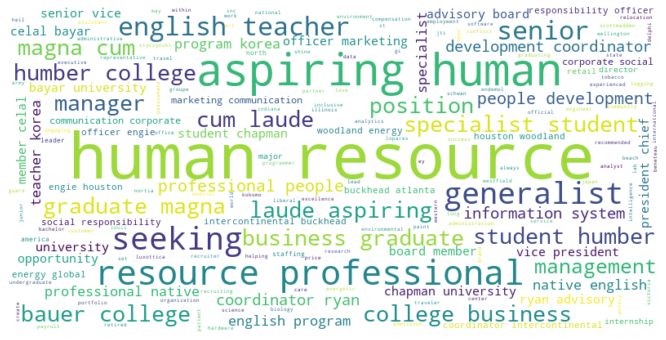

In [53]:
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## split and lemmatize 

In [54]:
df1['job_title2_lst'] = df1['job_title2'].apply(lambda text: [lem.lemmatize(word) for word in text.split()])

In [78]:
keywords = ['aspiring human resources' , 'seeking human resources']
keywords_split = list(map(lambda text: [lem.lemmatize(word) for word in text.split()], keywords))
keywords_split

[['aspiring', 'human', 'resource'], ['seeking', 'human', 'resource']]

In [119]:
phrase_one = keywords_split[0]
phrase_two = keywords_split[1]

In [126]:
print('phrase_one: ',phrase_one)
print(' ')
print('phrase_two: ',phrase_two)

phrase_one:  ['aspiring', 'human', 'resource']
 
phrase_two:  ['seeking', 'human', 'resource']


## **from 10-20-23 meeting with Naveen**

**Google Search for the job title abbreviation site**
https://www.google.com/search?q=job+title+short+form+to+full+form&rlz=1C5GCEM_enUS1016US1016&oq=job+title+short+form+to+full+form&gs_lcrp=EgZjaHJvbWUyBggAEEUYOdIBCTEzNDEwajBqN6gCALACAA&sourceid=chrome&ie=UTF-8

**job tile abbreviations**
https://blog.ongig.com/job-titles/job-title-abbreviations-acronyms/#:~:text=CIO%20%E2%80%94%20Chief%20Information%20Officer,COO%20%E2%80%94%20Chief%20Operation%20Officer

#### Articles on Similarity

**Read third**    
https://towardsdatascience.com/bert-for-measuring-text-similarity-eec91c6bf9e1

**Read first**
https://www.newscatcherapi.com/blog/ultimate-guide-to-text-similarity-with-python

**Read second**
https://spotintelligence.com/2022/12/19/text-similarity-python/

# BERT


In [55]:
s_embedder = SentenceTransformer('all-mpnet-base-v2')

In [56]:
# BERT Model

s_embedder = SentenceTransformer('all-mpnet-base-v2')
# s_embedder = SentenceTransformer('bert-base-nli-mean-tokens')
bert_embeddings = s_embedder.encode(df1.job_title2_lst)

# print(bert_embeddings.shape)

X_search_one = s_embedder.encode(phrase_one)
X_search_two = s_embedder.encode(phrase_two)

print("Top 10 candidates for the job title:", phrase_one)
bert_similarity_query1 = check_similarity("BERT_cosine_sim_query1", bert_embeddings, X_search_one)
print("Top 10 candidates for the job title:", phrase_two)
bert_similarity_query2 = check_similarity("BERT_cosine_sim_query2", bert_embeddings, X_search_two)

IndexError: list index out of range

In [133]:
# !conda install pytorch torchvision torchaudio -c pytorch.


UnavailableInvalidChannel: HTTP 404 NOT FOUND for channel pytorch. <https://conda.anaconda.org/pytorch.>

The channel is not accessible or is invalid.

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.


In [71]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [103]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

ChatGPT If you want to work with a TensorFlow-based model, you should use a library that specifically supports TensorFlow, such as the TensorFlow Transformers (formerly known as "bert-for-tf2") library. Here's how you can modify the code to use TensorFlow Transformers with a BERT model:

Example of How to do the vectorization for this project 

https://github.com/sudarshanng7/oSD8VE4tiyrrxCdC/blob/master/potential-candidates.ipynb